In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
netflix_dataset=pd.read_csv("/content/drive/MyDrive/Content/combined_data_1.txt.zip",header=None,names=['Cust_Id','Rating'],usecols=[0,1])

In [199]:
dataset=pd.read_csv("/content/drive/MyDrive/Content/combined_data_1.txt.zip",header=None,names=['Cust_Id','Rating'],usecols=[0,1])

In [3]:
netflix_dataset.head()


,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [4]:
customer_count=netflix_dataset['Cust_Id'].nunique()

In [5]:
customer_count

475257

In [6]:
movie_count=netflix_dataset.isnull().sum()

In [7]:
movie_count
# No. of movie is 4499

Cust_Id       0
Rating     4499
dtype: int64

In [8]:
customer_count

475257

In [9]:
customer_count=netflix_dataset['Cust_Id'].nunique()-movie_count

In [10]:
customer_count

Cust_Id    475257
Rating     470758
dtype: int64

In [11]:
# There are 470758 Unique Customers not 475257.
# Because the data is a fuzzy data  so (470758+4499) 4499 is the total number of movies.

In [12]:
rating_count=netflix_dataset['Rating'].count()-movie_count

In [200]:
rating_count

Cust_Id    24053764
Rating     24049265
dtype: int64

In [14]:
stars=netflix_dataset.groupby('Rating')['Rating'].agg(['count'])

In [15]:
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [201]:
p=dataset.groupby('Rating')['Rating'].agg(['count'])

Text(0.5, 1.0, 'Total Pool: Cust_Id       0\nRating     4499\ndtype: int64 Movies, Cust_Id    475257\nRating     470758\ndtype: int64 Customers, Cust_Id    24053764\nRating     24049265\ndtype: int64 ratings given')

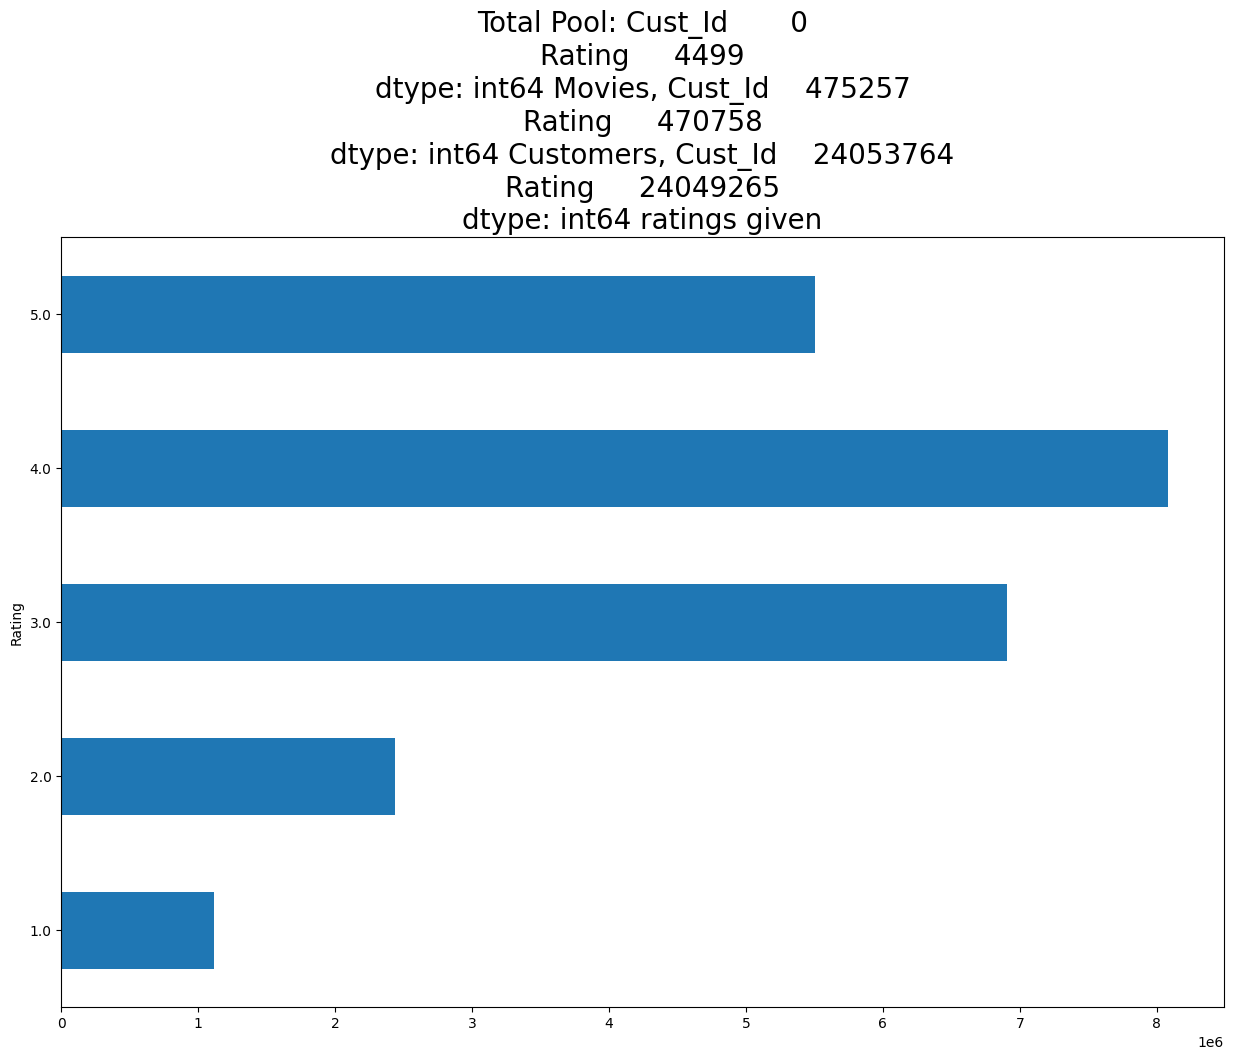

In [205]:
ax=p.plot(kind='barh',legend=False, figsize=(15,10))
plt.title(f'Total Pool: {movie_count} Movies, {customer_count} Customers, {rating_count} ratings given',fontsize=20)


In [16]:
|from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
df_nan=pd.DataFrame(pd.isnull(netflix_dataset.Rating))
df_nan

,Rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [18]:
df_nan=df_nan[df_nan['Rating']==True]
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [19]:
df_nan.shape

(4499, 1)

In [20]:
df_nan=df_nan.reset_index()
df_nan

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [21]:
movie_id=1
movie_np=[]

for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
  temp=np.full((1,i-j-1),movie_id)
  movie_np=np.append(movie_np,temp)
  movie_id+=1

In [22]:
df_nan.iloc[-1,0]

24057834

In [23]:
len(netflix_dataset)

24058263

In [24]:
len(netflix_dataset)

24058263

In [25]:

last_record =np.full((1,len(netflix_dataset) - df_nan.iloc[-1,0]-1), movie_id)
movie_np=np.append(movie_np,last_record)

print(f'Movie Numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie Numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [26]:
df_nan['index'][1:]

1            548
2            694
3           2707
4           2850
5           3991
          ...   
4494    24046714
4495    24047329
4496    24056849
4497    24057564
4498    24057834
Name: index, Length: 4498, dtype: int64

In [27]:
df_nan['index'][:-1]

0              0
1            548
2            694
3           2707
4           2850
          ...   
4493    24046583
4494    24046714
4495    24047329
4496    24056849
4497    24057564
Name: index, Length: 4498, dtype: int64

In [28]:
x=zip(df_nan['index'][1:],df_nan['index'][:-1])

In [29]:
netflix_dataset=netflix_dataset[pd.notnull(netflix_dataset['Rating'])]
netflix_dataset['Movie_Id']=movie_np.astype(int)
netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id'].astype(int)
print("Now the dataset will look like :")
netflix_dataset.head()

<ipython-input-29-675c15a73a6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Movie_Id']=movie_np.astype(int)


Now the dataset will look like :


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [30]:
netflix_dataset.tail()

,Cust_Id,Rating,Movie_Id
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499
24058262,1704416,3.0,4499


In [31]:
f=['count','mean']

In [32]:
dataset_movie_summary=netflix_dataset.groupby('Movie_Id').agg(f)

In [33]:
dataset_movie_summary

Cust_Id               Rating          
           count          mean  count      mean
Movie_Id                                       
1            547  1.249876e+06    547  3.749543
2            145  1.341926e+06    145  3.558621
3           2012  1.324290e+06   2012  3.641153
4            142  1.402854e+06    142  2.739437
5           1140  1.302384e+06   1140  3.919298
...          ...           ...    ...       ...
4495         614  1.321093e+06    614  3.478827
4496        9519  1.332006e+06   9519  3.763000
4497         714  1.330543e+06    714  2.715686
4498         269  1.262035e+06    269  2.464684
4499         428  1.270551e+06    428  2.614486

[4499 rows x 4 columns]

In [34]:
data_movie_summary=netflix_dataset.groupby('Movie_Id')['Rating'].agg(f)

In [35]:
data_movie_summary

,count,mean
Movie_Id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298
...,...,...
4495,614,3.478827
4496,9519,3.763000
4497,714,2.715686


In [36]:
data_movie_summary['count'].quantile(0.7)

1798.6

In [37]:
movie_benchmark=round(data_movie_summary['count'].quantile(0.7),0)
movie_benchmark

1799.0

In [38]:
data_movie_summary['count']

Movie_Id
1        547
2        145
3       2012
4        142
5       1140
        ... 
4495     614
4496    9519
4497     714
4498     269
4499     428
Name: count, Length: 4499, dtype: int64

In [39]:
drop_movie_list=dataset_movie_summary[data_movie_summary['count']<movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
       ...
       4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_Id', length=3149)

In [40]:
data_cust_summary=netflix_dataset.groupby('Cust_Id')['Rating'].agg(f)

In [41]:
data_cust_summary

,count,mean
Cust_Id,,
6,153,3.333333
7,195,4.066667
8,21,4.000000
10,49,3.346939
25,4,3.500000
...,...,...
2649404,12,4.083333
2649409,10,4.000000
2649421,3,5.000000


In [42]:
cust_benchmark=round(data_cust_summary['count'].quantile(0.7),0)
cust_benchmark

52.0

In [43]:
drop_cust_list=data_cust_summary[data_cust_summary['count']<cust_benchmark].index
drop_cust_list

Index([      8,      10,      25,      33,      42,      59,      83,      87,
            94,     116,
       ...
       2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='Cust_Id', length=327300)

In [44]:
print('The original dataframe has: ',netflix_dataset.shape,'shape')

The original dataframe has:  (24053764, 3) shape


In [45]:
netflix_dataset=netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]
netflix_dataset=netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]
print('After the triming, the shape is: {}'.format(netflix_dataset.shape))

After the triming, the shape is: (17337458, 3)


In [46]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [47]:
import pandas as pd
df_title=pd.read_csv("movie_titles.csv", encoding='ISO-8859-1', header=None, usecols=[0,1,2],names=['Movie_Id','Year','Name'])

In [48]:
df_title.head()

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [49]:
df_title.set_index('Movie_Id', inplace=True)

In [50]:
df_title.head(10)

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


In [51]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357243 sha256=29e604d870d7c8f31ad8ad02012d4836768bd5ddfebef52b830dc12552f6bd03
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [52]:
import math
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [53]:
reader=Reader()

In [54]:
data=Dataset.load_from_df(netflix_dataset[['Cust_Id','Movie_Id','Rating']][:100000],reader)

In [55]:
svd=SVD()

In [56]:
cross_validate(svd,data,measures=['RMSE','MAE'],verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0039  0.9932  0.9885  1.0015  0.9959  0.9966  0.0056  
MAE (testset)     0.8045  0.7947  0.7924  0.7958  0.7880  0.7951  0.0054  
Fit time          2.06    3.75    6.29    2.56    1.74    3.28    1.65    
Test time         0.25    0.22    0.35    0.35    0.24    0.28    0.06    


{'test_rmse': array([1.00386227, 0.99315053, 0.9885244 , 1.00154233, 0.99593951]),
 'test_mae': array([0.80454608, 0.79472781, 0.79243845, 0.79580311, 0.78804533]),
 'fit_time': (2.060819149017334,
  3.7455012798309326,
  6.2861127853393555,
  2.561702251434326,
  1.7386817932128906),
 'test_time': (0.2529265880584717,
  0.21886324882507324,
  0.3533790111541748,
  0.34804415702819824,
  0.2350757122039795)}

In [91]:
netflix_dataset.head(150)

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
879,1733406,4.0,3
880,755319,3.0,3
881,1743030,3.0,3
883,2096587,5.0,3


In [58]:
#so first we take an user= 712664 and we try to recommend some movies based on the past data
#He rated so many movies with 5 Stars
cust_712664=netflix_dataset[(netflix_dataset['Cust_Id']==712664)&(netflix_dataset['Rating']==5)]


In [59]:
cust_712664

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
308787,712664,5.0,79
577555,712664,5.0,175
898451,712664,5.0,199
1019562,712664,5.0,241
...,...,...,...
20461546,712664,5.0,3887
21752209,712664,5.0,4109
22487781,712664,5.0,4266
23397883,712664,5.0,4384


In [60]:
#cust_712664=cust_712664.set_index('Movie_Id')
#cust_712664=cust_712664.join(df_title)['Name']

In [61]:
cust_712664

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
308787,712664,5.0,79
577555,712664,5.0,175
898451,712664,5.0,199
1019562,712664,5.0,241
...,...,...,...
20461546,712664,5.0,3887
21752209,712664,5.0,4109
22487781,712664,5.0,4266
23397883,712664,5.0,4384


In [62]:
user_712664=df_title.copy()
user_712664

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [63]:
user_712664=user_712664.reset_index()
user_712664

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [64]:
user_712664=user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]
user_712664

,Movie_Id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [65]:
user_712664['Estimate_Score']=user_712664['Movie_Id'].apply(lambda x: svd.predict(712664,x).est)
user_712664=user_712664.drop('Movie_Id',axis=1)

<ipython-input-65-379358c912f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_712664['Estimate_Score']=user_712664['Movie_Id'].apply(lambda x: svd.predict(712664,x).est)


In [66]:
user_712663=user_712664.sort_values('Estimate_Score')
print(user_712664)

         Year                                               Name  \
2      1997.0                                          Character   
7      2004.0                         What the #$*! Do We Know!?   
15     1996.0                                          Screamers   
16     2005.0                                          7 Seconds   
17     1994.0                                   Immortal Beloved   
...       ...                                                ...   
17765  2002.0  Where the Wild Things Are and Other Maurice Se...   
17766  2004.0                  Fidel Castro: American Experience   
17767  2000.0                                              Epoch   
17768  2003.0                                        The Company   
17769  2003.0                                       Alien Hunter   

       Estimate_Score  
2            4.008982  
7            3.554340  
15           3.397598  
16           3.386124  
17           3.692982  
...               ...  
17765        3.

In [67]:
user_712664=user_712664.sort_values('Estimate_Score',ascending=False)
print(user_712664.head(10))

         Year                    Name  Estimate_Score
27     2002.0         Lilo and Stitch        4.147489
2      1997.0               Character        4.008982
29     2003.0  Something's Gotta Give        3.827472
12902  1999.0                 Head On        3.765106
12890  2003.0            24: Season 3        3.765106
12891  1995.0                   Smoke        3.765106
12892  2004.0    Driving Miss Wealthy        3.765106
12893  1960.0        The Time Machine        3.765106
12894  1997.0                 Ivanhoe        3.765106
12895  1994.0   Bullets Over Broadway        3.765106


# 1. Find out the list of most popular and liked genre
# - Pirates of the Caribbean: The Curse of the Black Pearl

In [68]:
netflix_dataset.head(5)

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [69]:
df_title.head(5)


,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


In [70]:
No_Of_Rating=netflix_dataset.groupby('Movie_Id')['Rating'].agg('count')


In [71]:
No_Of_Rating=pd.DataFrame(No_Of_Rating)

In [72]:
No_Of_Rating.rename(columns={"Rating":"Rating Count"},inplace=True)

In [73]:
No_Of_Rating.sort_values('Movie_Id',inplace=True)

In [74]:
No_Of_Rating=No_Of_Rating.merge(df_title,on='Movie_Id')

In [75]:
No_Of_Rating.reset_index(inplace=True)

In [76]:
No_Of_Rating.columns

Index(['Movie_Id', 'Rating Count', 'Year', 'Name'], dtype='object')

In [77]:
No_of_Rating=No_Of_Rating[["Movie_Id","Name","Year","Rating Count"]]

In [78]:
No_Of_Rating

,Movie_Id,Rating Count,Year,Name
0,3,1524,1997.0,Character
1,8,9379,2004.0,What the #$*! Do We Know!?
2,16,2517,1996.0,Screamers
3,17,4165,2005.0,7 Seconds
4,18,9419,1994.0,Immortal Beloved
...,...,...,...,...
1345,4488,27997,2000.0,Wonder Boys
1346,4490,7507,2004.0,Ned Kelly
1347,4492,7511,2004.0,Club Dread
1348,4493,4743,2003.0,Ju-on: The Grudge


In [79]:
temp=No_Of_Rating.sort_values('Rating Count',ascending=False)[:1]

In [80]:
Most_Popular_Movie=temp['Name']

In [81]:
print(Most_Popular_Movie)

587    Pirates of the Caribbean: The Curse of the Bla...
Name: Name, dtype: object


In [82]:

temp

,Movie_Id,Rating Count,Year,Name
587,1905,117075,2003.0,Pirates of the Caribbean: The Curse of the Bla...


# 2. Create Model that finds the best suited Movie for one user in every genre.

In [110]:
c109089=netflix_dataset[(netflix_dataset['Cust_Id']==109089)&(netflix_dataset['Rating']==5)]
c109089.shape
user_109089=df_title.copy()


In [111]:
user_109089=user_109089.reset_index()
user_109089=user_109089[~user_109089['Movie_Id'].isin(drop_movie_list)]
user_109089

,Movie_Id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [112]:
user_109089['Estimate_Score']=user_109089['Movie_Id'].apply(lambda x: svd.predict(109089,x).est)
user_109089=user_109089.drop('Movie_Id',axis=1)
user_109089

,Year,Name,Estimate_Score
2,1997.0,Character,4.326746
7,2004.0,What the #$*! Do We Know!?,3.561487
15,1996.0,Screamers,3.315462
16,2005.0,7 Seconds,3.194686
17,1994.0,Immortal Beloved,4.182913
...,...,...,...
17765,2002.0,Where the Wild Things Are and Other Maurice Se...,3.717037
17766,2004.0,Fidel Castro: American Experience,3.717037
17767,2000.0,Epoch,3.717037
17768,2003.0,The Company,3.717037


In [113]:
user_109089=user_109089.sort_values(by='Estimate_Score',ascending=False)
user_109089

,Year,Name,Estimate_Score
2,1997.0,Character,4.326746
17,1994.0,Immortal Beloved,4.182913
27,2002.0,Lilo and Stitch,4.106053
29,2003.0,Something's Gotta Give,3.894297
12895,1994.0,Bullets Over Broadway,3.717037
...,...,...,...
17769,2003.0,Alien Hunter,3.717037
7,2004.0,What the #$*! Do We Know!?,3.561487
25,2004.0,Never Die Alone,3.441648
15,1996.0,Screamers,3.315462


# 3. Find what Genre Movies have received the best and worst ratings based on User Rating.


In [122]:
temp

,mean,count
Movie_Id,,
3,3.621391,1524
8,3.136795,9379
16,3.081843,2517
17,2.909964,4165
18,3.767597,9419
...,...,...
4488,3.540236,27997
4490,3.161849,7507
4492,2.652510,7511


In [129]:
temp=netflix_dataset.sort_values(by='Rating',ascending=False)

In [167]:
Highest_Rated_Movies=temp[temp['Rating']==5]
Lowest_Rated_Movies=temp[temp['Rating']==1]

In [134]:
# Higest rated movies rated by users are :
Highest_Rated_Movies.nunique()

Cust_Id     141769
Rating           1
Movie_Id      1350
dtype: int64

In [135]:
Highest_Rated_Movies.shape

(3769803, 3)

In [177]:
Highest_Rated_Movies=Highest_Rated_Movies.groupby('Movie_Id')['Cust_Id'].agg(['count'])

In [179]:
Highest_Rated_Movies=Highest_Rated_Movies.sort_values(by='count',ascending=False)
Highest_Rated_Movies

,count
Movie_Id,
2452,64502
3962,51765
4306,49314
1905,48840
2782,46220
...,...
2467,57
4131,54
4106,54


In [180]:
Highest_Rated_Movies.reset_index()

,Movie_Id,count
0,2452,64502
1,3962,51765
2,4306,49314
3,1905,48840
4,2782,46220
...,...,...
1345,2467,57
1346,4131,54
1347,4106,54
1348,181,46


In [181]:
Highest_Rated_Movies=Highest_Rated_Movies.merge(df_title,on='Movie_Id')
#Highest_Rated_Movies.drop(columns=['Name_y','Year_y'],inplace=True)
#Highest_Rated_Movies.drop(columns=['Name_x','Year_x'],inplace=True)
#Highest_Rated_Movies.reset_index()

In [182]:
Highest_Rated_Movies

,count,Year,Name
Movie_Id,,,
2452,64502,2001.0,Lord of the Rings: The Fellowship of the Ring
3962,51765,2003.0,Finding Nemo (Widescreen)
4306,49314,1999.0,The Sixth Sense
1905,48840,2003.0,Pirates of the Caribbean: The Curse of the Bla...
2782,46220,1995.0,Braveheart
...,...,...,...
2467,57,2001.0,Town & Country
4131,54,1990.0,Hidden Agenda
4106,54,2001.0,The Invisible Circus


In [189]:
Top10_Highest_Rated_Movies=Highest_Rated_Movies['Name'][:10]

In [190]:
print("All the highest rated movies are rated by users are :\n",Top10_Highest_Rated_Movies)

All the highest rated movies are rated by users are :
 Movie_Id
2452        Lord of the Rings: The Fellowship of the Ring
3962                            Finding Nemo (Widescreen)
4306                                      The Sixth Sense
1905    Pirates of the Caribbean: The Curse of the Bla...
2782                                           Braveheart
2862                             The Silence of the Lambs
3938                                              Shrek 2
571                                       American Beauty
3290                                        The Godfather
3605                The Wizard of Oz: Collector's Edition
Name: Name, dtype: object


In [169]:
print(Lowest_Rated_Movies.nunique())
print(Lowest_Rated_Movies.shape)

Cust_Id     110321
Rating           1
Movie_Id      1350
dtype: int64
(721356, 3)


In [170]:
Lowest_Rated_Movies

,Cust_Id,Rating,Movie_Id
17070885,296177,1.0,3290
5087768,1054514,1.0,1027
13552124,2125852,1.0,2580
15901632,114748,1.0,3098
5328563,133993,1.0,1075
...,...,...,...
17805362,75673,1.0,3416
12101672,1515015,1.0,2346
17805356,847774,1.0,3416
17805354,1292631,1.0,3416


In [171]:
Lowest_Rated_Movies=Lowest_Rated_Movies.groupby('Movie_Id')['Cust_Id'].agg(['count'])
Lowest_Rated_Movies

,count
Movie_Id,
3,61
8,1333
16,149
17,337
18,161
...,...
4488,749
4490,363
4492,1245


In [173]:
Lowest_Rated_Movies=Lowest_Rated_Movies.merge(df_title,on='Movie_Id')

In [174]:
Lowest_Rated_Movies

,count,Year,Name
Movie_Id,,,
3,61,1997.0,Character
8,1333,2004.0,What the #$*! Do We Know!?
16,149,1996.0,Screamers
17,337,2005.0,7 Seconds
18,161,1994.0,Immortal Beloved
...,...,...,...
4488,749,2000.0,Wonder Boys
4490,363,2004.0,Ned Kelly
4492,1245,2004.0,Club Dread


In [193]:
Lowest_Rated_Movies.reset_index()

,Movie_Id,count,Year,Name
0,952,23,1940.0,My Favorite Wife
1,4238,23,2000.0,Inu-Yasha
2,395,25,1935.0,Captain Blood
3,2418,27,1960.0,Sink the Bismarck
4,4179,27,1951.0,A Christmas Carol
...,...,...,...,...
1345,3254,4726,2003.0,Daredevil
1346,4345,5050,2002.0,Bowling for Columbine
1347,3756,5668,2002.0,About Schmidt
1348,1145,6707,2001.0,The Wedding Planner


In [194]:
Lowest_Rated_Movies=Lowest_Rated_Movies.sort_values(by='count',ascending=False)
Lowest_Rated_Movies

,count,Year,Name
Movie_Id,,,
3151,7807,2004.0,Napoleon Dynamite
1145,6707,2001.0,The Wedding Planner
3756,5668,2002.0,About Schmidt
4345,5050,2002.0,Bowling for Columbine
3254,4726,2003.0,Daredevil
...,...,...,...
4179,27,1951.0,A Christmas Carol
2418,27,1960.0,Sink the Bismarck
395,25,1935.0,Captain Blood


In [197]:
Top10_Lowest_Rated_Movies=Lowest_Rated_Movies['Name'][:10]
print("Top 10 Lowest Rated Movies are :\n",Top10_Lowest_Rated_Movies)

Top 10 Lowest Rated Movies are :
 Movie_Id
3151                     Napoleon Dynamite
1145                   The Wedding Planner
3756                         About Schmidt
4345                 Bowling for Columbine
3254                             Daredevil
4266             The Passion of the Christ
1719    The Life Aquatic with Steve Zissou
1975                            Hollow Man
2675                               Solaris
1289                Look Who's Talking Too
Name: Name, dtype: object
